# Example: Fourier Series for a Discontinuous Hat Function

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft


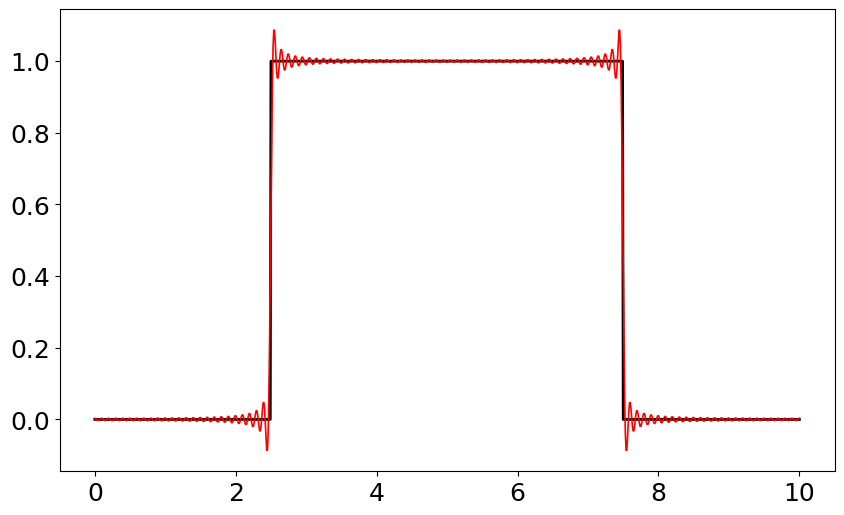

In [45]:
# Define the step size and the range of x
dx = 0.01
L = 10
x = np.arange(0, L+dx, dx)
n = len(x)
nquart = int(n/4)

# Initialize the function f as an array of zeros
f = np.zeros(x.shape)

# Set the middle half of the array to 1
f[nquart:3*nquart] = 1
# Compute the A0 coefficient

A0 = sum(f*np.ones(x.shape))*dx*2/L
# Initialize fFS with A0/2

fFS = A0/2
# Loop through k values from 1 to 100

for k in range(1,101):
    Ak = sum(f*np.cos(2*np.pi*k*x/L))*dx*2/L
    Bk = sum(f*np.sin(2*np.pi*k*x/L))*dx*2/L
    fFS = fFS + Ak*np.cos(2*k*np.pi*x/L) + Bk*np.sin(2*k*np.pi*x/L)
    
# Plot the original function f in black, and the Fourier series fFS in red

plt.figure(figsize=(10,6))
plt.plot(x,f,'k',linewidth=2)
plt.plot(x,fFS,'r-',linewidth=1.2)
plt.show()

# FFT in Python

from matplotlib import pyplot as plt
import numpy as np
from scipy.fftpack import fft


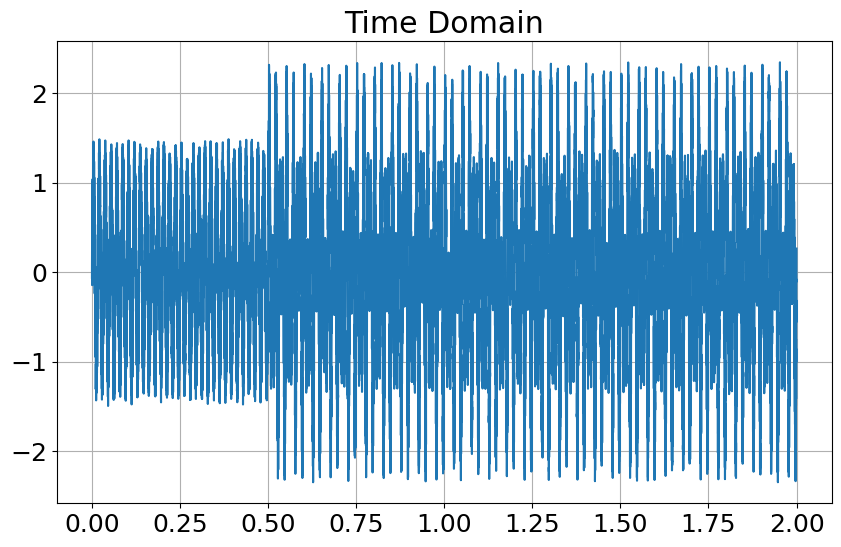

In [20]:
# %% Generate a Nonstationary Signal of 60Hz and 100Hz 
samping_rate = 10000
f1 = 60
f2 = 100
t = np.arange(0,2,1/samping_rate)
noise = np.random.uniform(-.5, .5, size=len(t)) # Random numbers between -0.5 and 0.5
s = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)*(t>=.5) + noise # Nonstationary signal with noise
plt.figure(figsize=(10,6))
plt.plot(t,s) # Plot time-domain response
plt.grid()
plt.title("Time Domain")
plt.show()


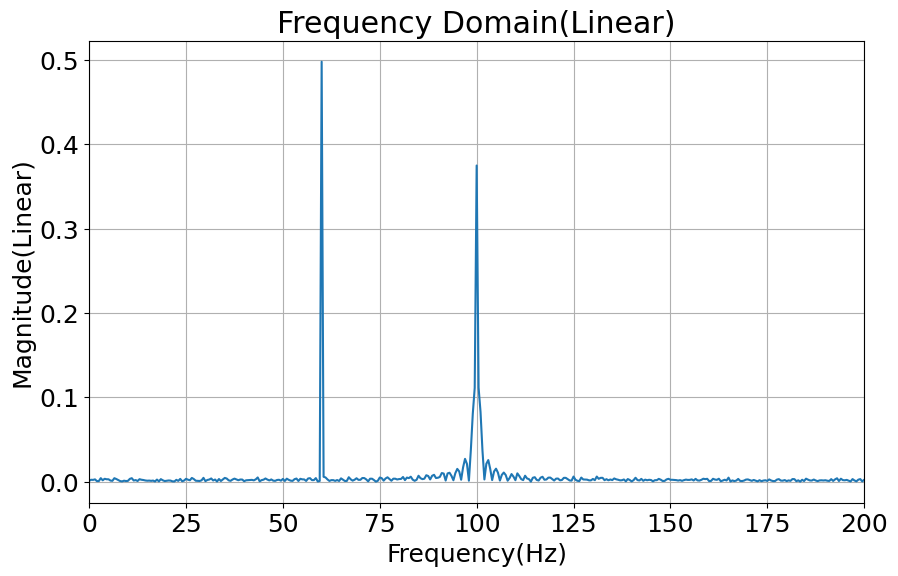

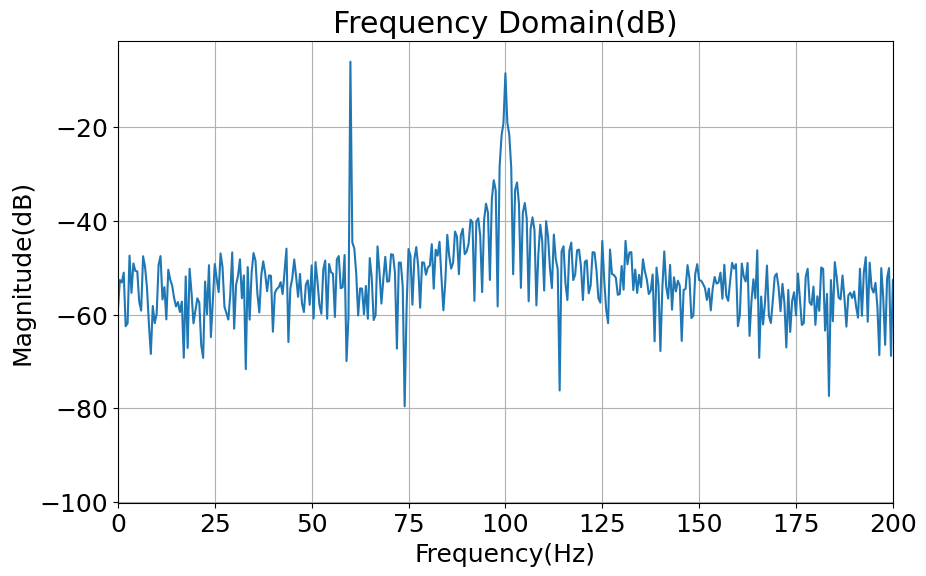

In [26]:
# Generate an array for Ferquency
freq = np.arange(0,samping_rate/2,samping_rate/len(s)) 
CalFFT = abs(fft(s)/len(s)) # Using fft from scipy package
# Keep low frequencies
LinearMag = CalFFT[range(0,int(np.ceil(len(CalFFT)/2)))]
 # Convert linear scale to dB scale 
dBMag = 20*np.log10(LinearMag)

plt.figure(figsize=(10,6))
plt.plot(freq,LinearMag) # Draw the spectrum in linear scale
plt.grid()
plt.xlim([0, 200])
plt.title("Frequency Domain(Linear)")
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude(Linear)')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(freq,dBMag) # Draw the spectrum in 
plt.grid()
plt.xlim([0, 200])
plt.title("Frequency Domain(dB)")
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude(dB)')
plt.show()


# FFT Denoise 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

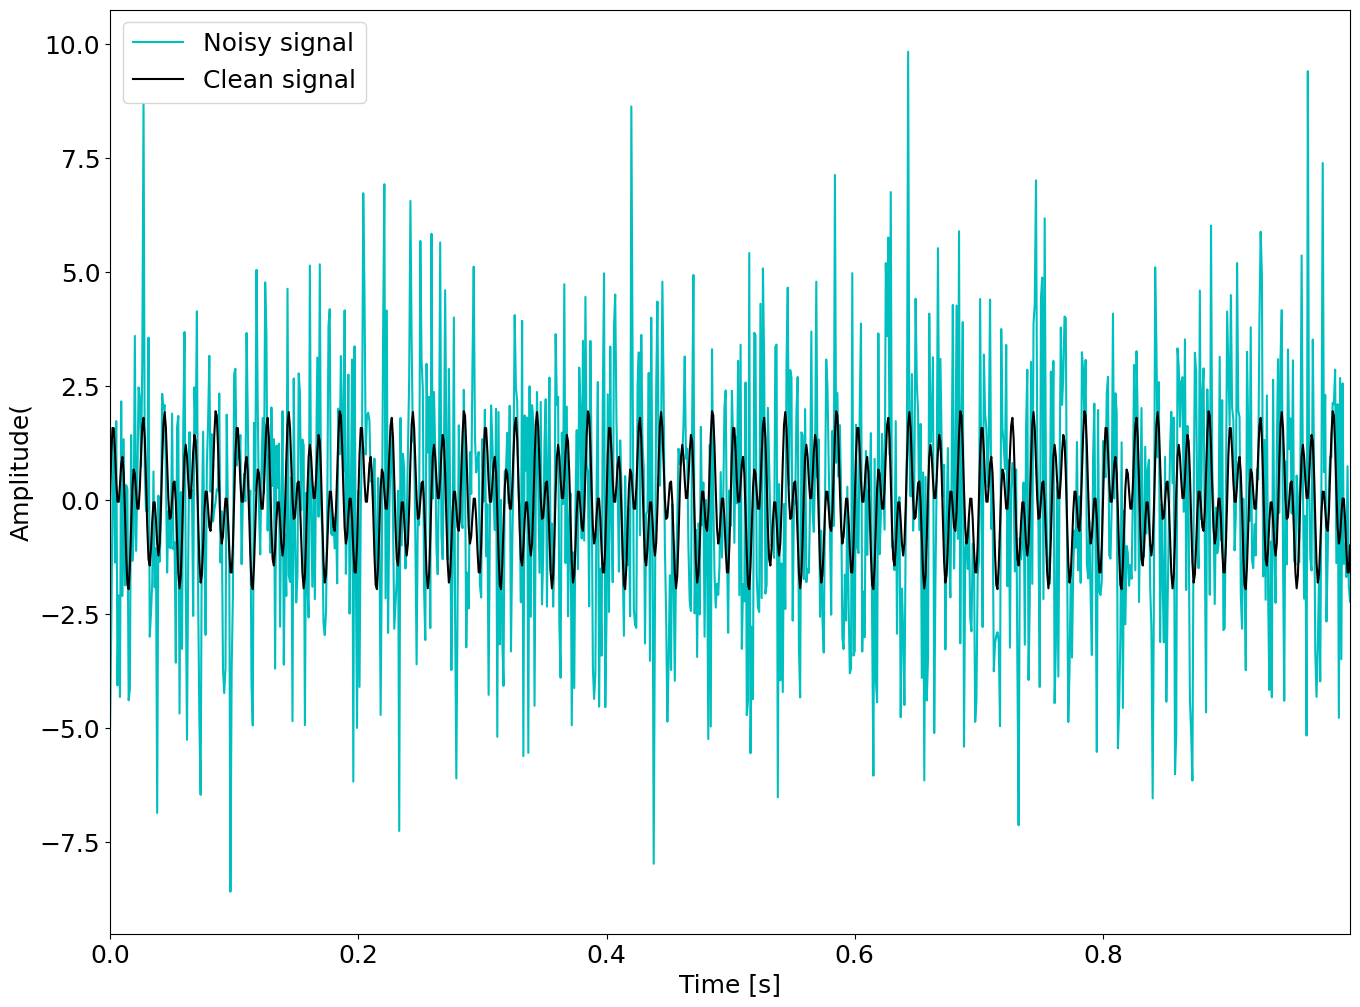

In [28]:
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams.update({'font.size': 18})

#Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0, 1, dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) #sum of two frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t)) #add noise

#Plot properties of the signal 
plt.plot(t, f,color= 'c', label='Noisy signal')
plt.plot(t, f_clean, color = 'k', label='Clean signal')
plt.xlim(t[0], t[-1])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude(')
plt.legend()
plt.show()

C:\Users\David\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


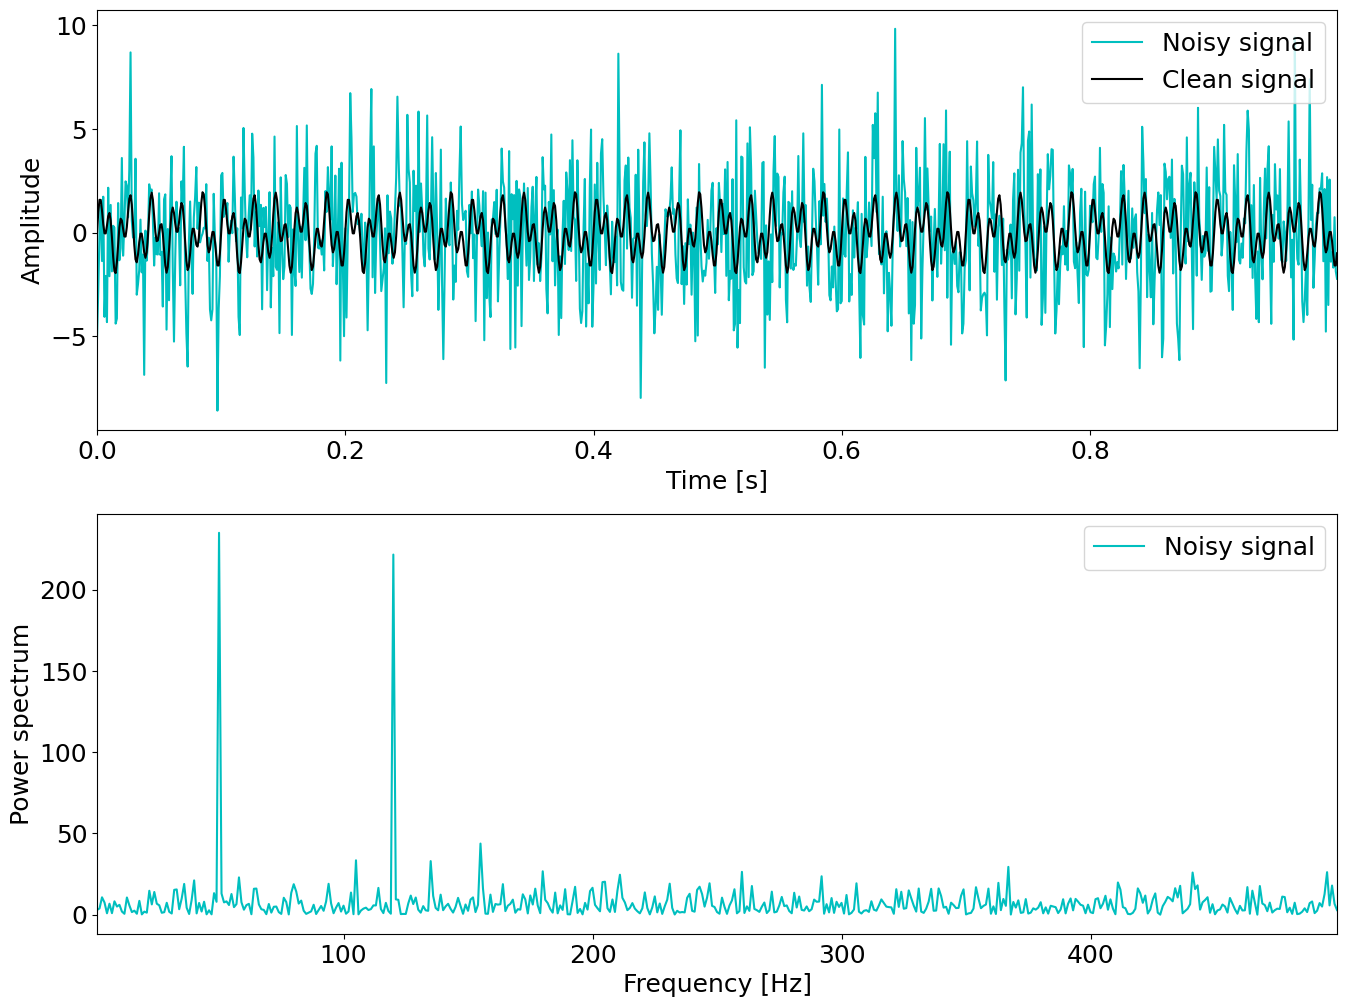

In [33]:
##Compute Fast Fourier Transform (FFT)

n = len(t) #length of the signal
f_hat = np.fft.fft(f, n) #compute the FFT (using numpy package)
PSD = f_hat * np.conj(f_hat) / n #power spectrum
freq = (1/(dt*n)) * np.arange(n) #frequency range
L = np.arange(1, np.floor(n/2), dtype='int') #only plot the first half

fig,axs = plt.subplots(2,1) # Create subplot
plt.sca(axs[0])
plt.plot(t, f, color ='c', label='Noisy signal')
plt.plot(t, f_clean, color ='k', label='Clean signal')
plt.xlim(t[0], t[-1])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color ='c', label='Noisy signal')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power spectrum')
plt.legend()

plt.show()



In [34]:
##Use PSD to filter out noise
indices = PSD > 100 #find all freqs with large power
PSDclean = PSD * indices #zero out all others
f_hat = indices * f_hat #zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(f_hat) #inverse FFT for filtered time signal


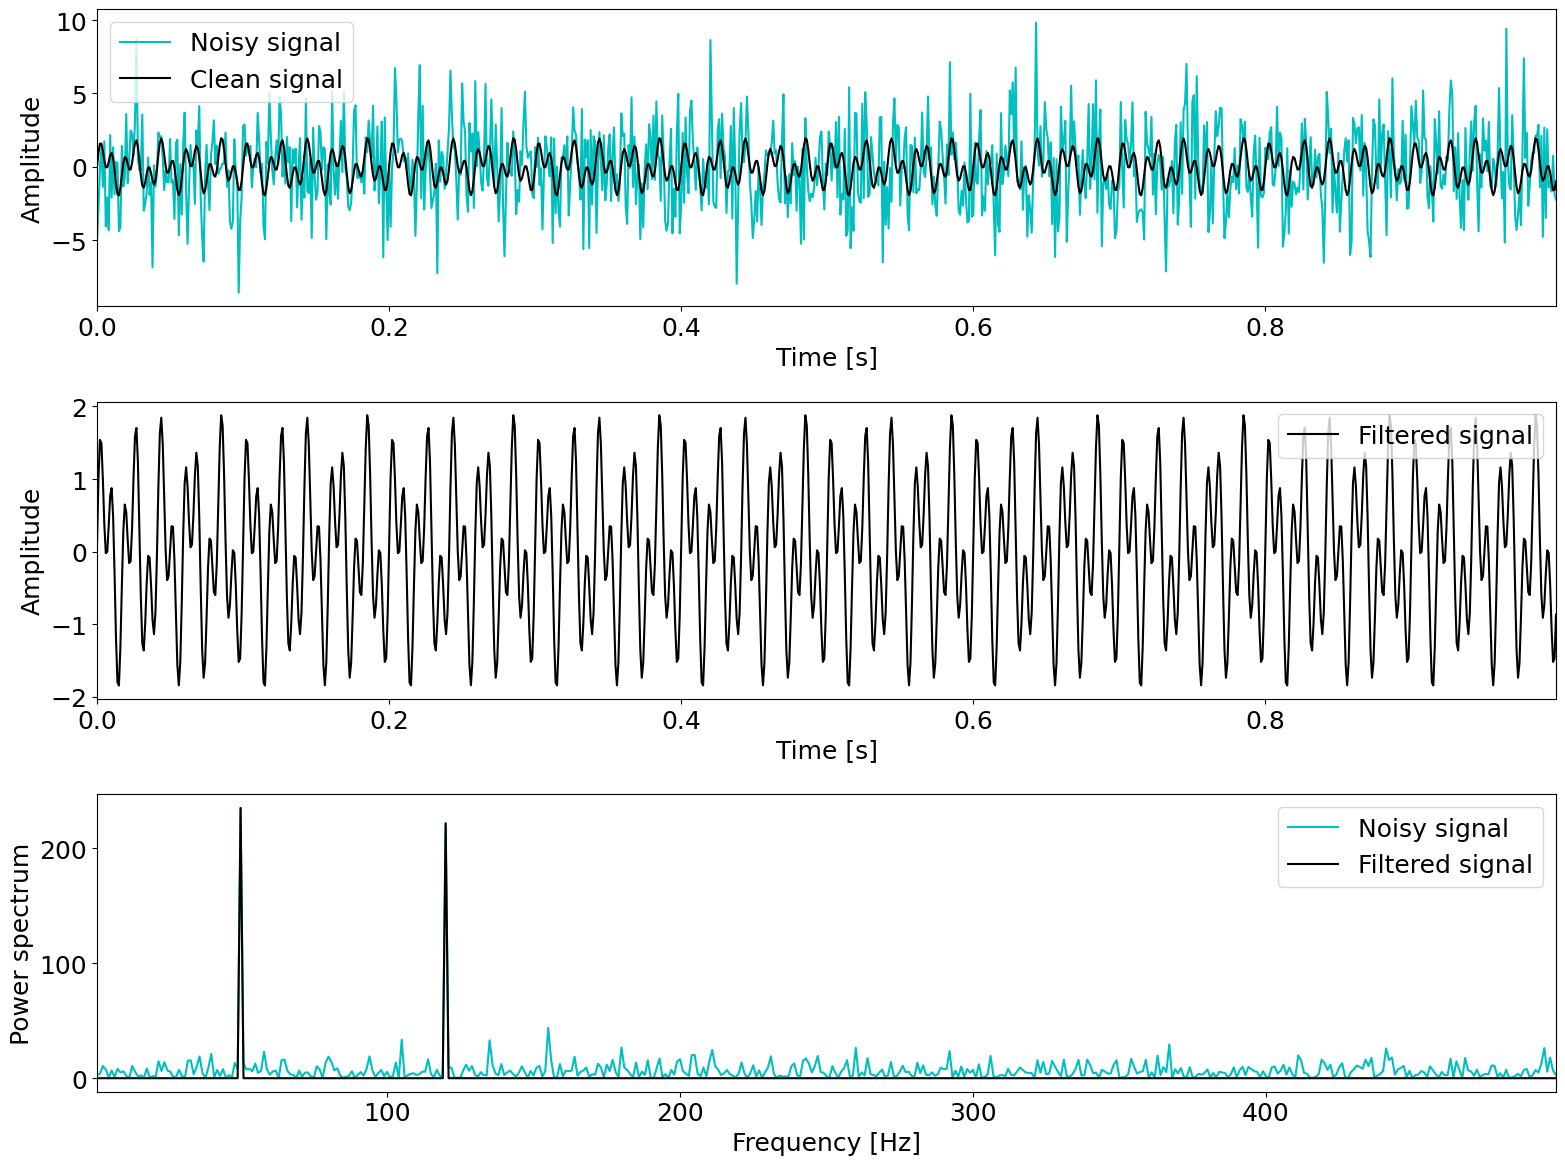

In [43]:
##Plot 
fig,axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(t, f, color ='c', label='Noisy signal')
plt.plot(t, f_clean, color ='k', label='Clean signal')
plt.xlim(t[0], t[-1])
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')
plt.legend()

plt.sca(axs[1])
plt.plot(t, ffilt, color ='k', label='Filtered signal')
plt.xlim(t[0], t[-1])
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Amplitude')
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color ='c', label='Noisy signal')
plt.plot(freq[L], PSDclean[L], color ='k', label='Filtered signal')
plt.xlim(freq[L[0]], freq[L[-1]])
axs[2].set_xlabel('Frequency [Hz]')
axs[2].set_ylabel('Power spectrum')
plt.legend()
fig.tight_layout()
plt.show()

